In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [96]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import warnings
warnings.filterwarnings('ignore') #Ignores warnings

In [176]:
#Loading the dataset
data = pd.read_csv(r'C:\Bharat_Intern\GOOG.csv')
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [177]:
print('Shape of Dataset: ',data.shape)

Shape of Dataset:  (1258, 14)


In [178]:
data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [179]:
#Check for null values
print(data.isnull().sum())

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [181]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [182]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [183]:
#select relevant features for prediction
data = data[['date', 'open', 'close']]
data['date'] = pd.to_datetime(data['date'].apply(lambda x: x.split()[0])) #Selecting only date
data.set_index('date',drop=True,inplace=True) #Setting date as index
data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


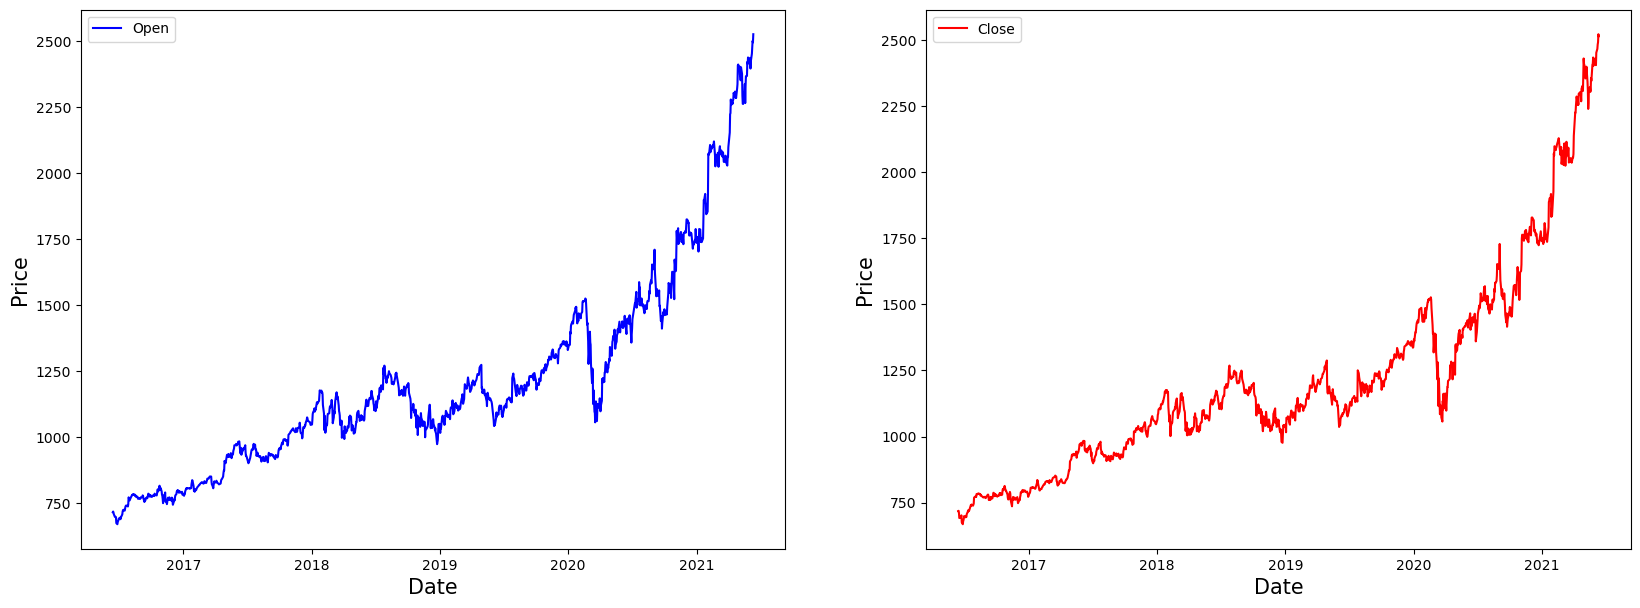

In [184]:
#Plot open and close price on data index
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(data['open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

plt.show()

In [185]:
#Data Preprocessing
#Normalize the dataset(All Columns)
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data)
data.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [186]:
train_data_size = round(len(data)*0.75) #75% of Training data and 20% as Testing data
print('Training data size: ',train_data_size)

Training data size:  944


In [187]:
train_data = data[:train_data_size]
test_data = data[train_data_size:]
print('Shape of Training data: ',train_data.shape)
print('Shape of Testing data: ',test_data.shape)

Shape of Training data:  (944, 2)
Shape of Testing data:  (314, 2)


In [188]:
#Function to create sequence of data for training and testing
def create_sequence(dataset):
    sequences = []
    labels=[]
    start_idx = 0
    
    for stop_idx in range(50,len(dataset)):   #Selecting 50 rows at a time
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))
x_train, y_train = create_sequence(train_data)
x_test,y_test = create_sequence(test_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

In [189]:
model = Sequential()
#importing Dense, Dropout, LSTM, Bidirectional from keras.layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 50, 50)            10600     
                                                                 
 dropout_18 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_38 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
28/28 [==============================] - 12s 154ms/step - loss: 0.0056 - mean_absolute_error: 0.0551 - val_loss: 0.0042 - val_mean_absolute_error: 0.0490
Epoch 2/50
28/28 [==============================] - 2s 83ms/step - loss: 8.1917e-04 - mean_absolute_error: 0.0225 - val_loss: 0.0055 - val_mean_absolute_error: 0.0614
Epoch 3/50
28/28 [==============================] - 2s 82ms/step - loss: 4.7672e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0022 - val_mean_absolute_error: 0.0366
Epoch 4/50
28/28 [==============================] - 2s 82ms/step - loss: 4.4601e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0015 - val_mean_absolute_error: 0.0305
Epoch 5/50
28/28 [==============================] - 2s 83ms/step - loss: 4.3970e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0025 - val_mean_absolute_error: 0.0386
Epoch 6/50
28/28 [==============================] - 2s 82ms/step - loss: 4.2916e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0038 - val_mean_absolute_error: 0.0486


In [191]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)
predict_test[:5]

9/9 [==============================] - 0s 26ms/step


array([[0.3876318 , 0.391012  ],
       [0.39153555, 0.39478004],
       [0.3924712 , 0.39559293],
       [0.39408493, 0.39714497],
       [0.3957132 , 0.39870515]], dtype=float32)

In [192]:
predict_train = scaler.inverse_transform(predict_test)
predict_train[:5]

array([[1389.6383, 1392.9382],
       [1396.8755, 1399.9216],
       [1398.6102, 1401.4282],
       [1401.6019, 1404.3047],
       [1404.6206, 1407.1962]], dtype=float32)

In [193]:
#Merge actual and predicted values
merge_data = pd.concat([data.iloc[-264:].copy(),
                      pd.DataFrame(predict_train,columns=['open_predicted','close_predicted'],
                                  index = data.iloc[-264:].index)],axis=1)
#Inverse normalization/Scaling
merge_data[['open','close']] = scaler.inverse_transform(merge_data[['open','close']])
merge_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1389.638306,1392.938232
2020-05-28,1396.86,1416.73,1396.875488,1399.921631
2020-05-29,1416.94,1428.92,1398.610229,1401.428223
2020-06-01,1418.39,1431.82,1401.601929,1404.304688
2020-06-02,1430.55,1439.22,1404.620605,1407.196167


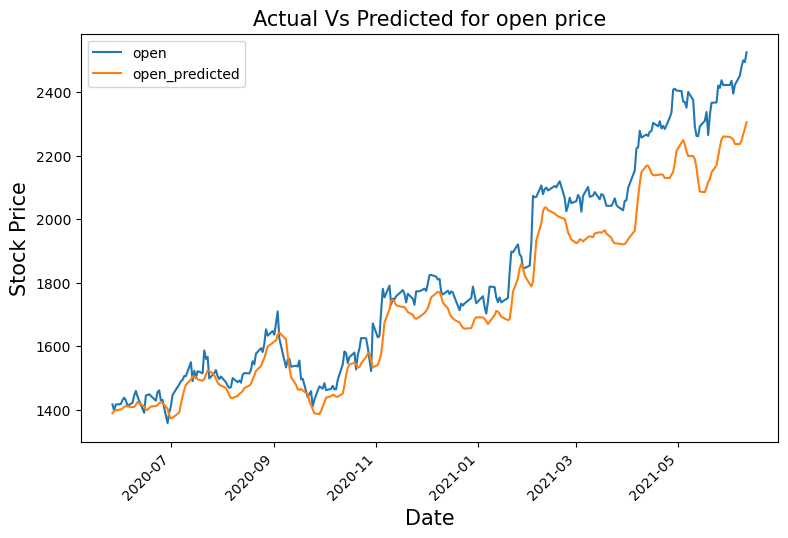

In [194]:
#Plotting the actual open and predicted open prices on date index
merge_data[['open','open_predicted']].plot(figsize=(9,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual Vs Predicted for open price',size=15)
plt.show()

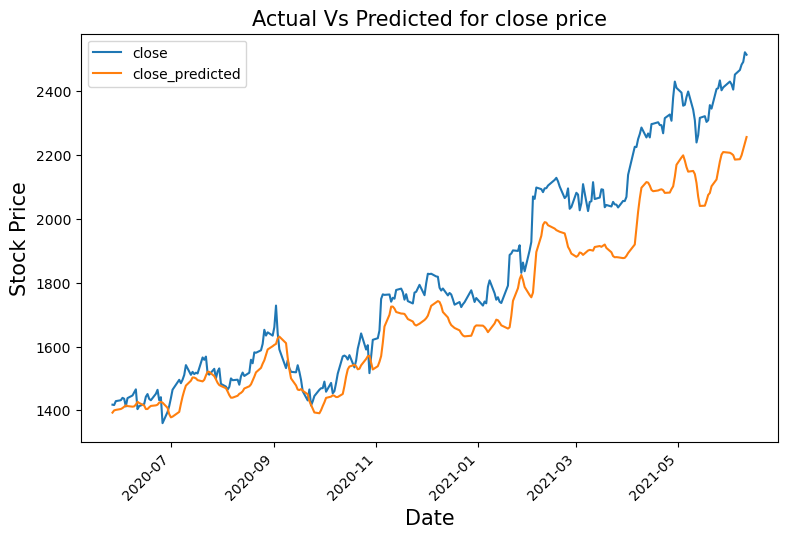

In [195]:
#Plotting the actual close and predicted close prices on date index
merge_data[['close','close_predicted']].plot(figsize=(9,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual Vs Predicted for close price',size=15)
plt.show()

In [199]:
# creating a DataFrame and filling values of open and close column
upcoming_predict = pd.DataFrame(columns=['open','close'],index=merge_data.index)
upcoming_predict.index=pd.to_datetime(upcoming_predict.index)
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_predict.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(x_test[-1:].shape)

1/1 [==============================] - 0s 56ms/step


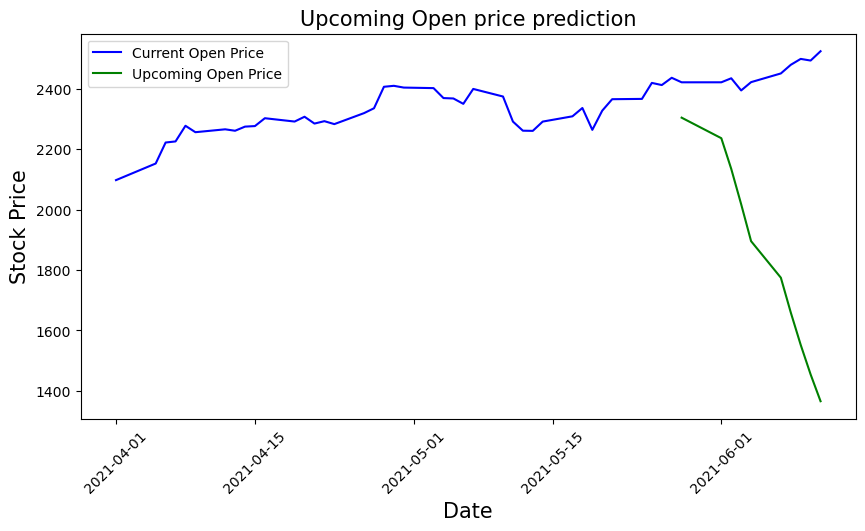

In [200]:
# inversing Normalization/scaling
upcoming_predict[['open','close']] = scaler.inverse_transform(upcoming_predict[['open','close']])
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data.loc['2021-04-01':,'open'],label='Current Open Price',color='blue')
ax.plot(upcoming_predict.loc['2021-04-01':,'open'],label='Upcoming Open Price',color='green')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

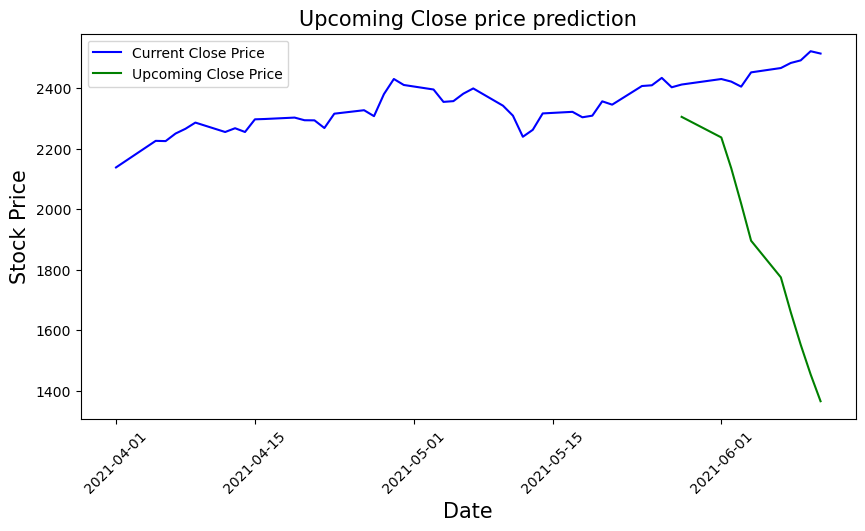

In [201]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data.loc['2021-04-01':,'close'],label='Current Close Price',color='blue')
ax.plot(upcoming_predict.loc['2021-04-01':,'open'],label='Upcoming Close Price',color='green')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Close price prediction',size=15)
ax.legend()
fig.show()